<a href="https://colab.research.google.com/github/Joycechidi/Deep-Learning-/blob/master/Federated_Deep_Learning_in_Pytorch_Pysyft.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Implementation of Federated Learning on The Fashion-MNIST Dataset Using Pytorch and PySyft

**Overview:** This is one of my keystone projects for the Secure and Private Artificial Intelligence Scholarship Challenge
All codes were written by Joyce Chidinma Chidiadi

# Why use Federated Learning at all?
Federated learning is a technique used to train decentralized data. The data can be in the hands of the users or owners while being trained as part of a model. The trained model from each user or device will be aggregated. this technique improves privacy and protects the owners data since the data will not leave the device. Federated learning promotes and supports the concept of data privacy and the GDPR in EU which enforces data protection for the users. It is a positive development in the use of data for building artificial intelligent models.

According to Google AI research, "Federated Learning enables mobile phones to collaboratively learn a shared prediction model while keeping all the training data on device, decoupling the ability to do machine learning from the need to store the data in the cloud. This goes beyond the use of local models that make predictions on mobile devices (like the Mobile Vision API and On-Device Smart Reply) by bringing model training to the device as well."

For more information about Federated learning, read this **[Google AI Blog here](https://ai.googleblog.com/2017/04/federated-learning-collaborative.html)**.

I used the FashionMNIST dataset for this project which has 10 different clothing labels.

This project is based on the**[ OpenMined Federated Learning tutorial found here]( https://blog.openmined.org/upgrade-to-federated-learning-in-10-lines/)**.

In [41]:
!pip install syft

In [42]:
!wget https://github.com/udacity/deep-learning-v2-pytorch/raw/master/intro-to-pytorch/helper.py

--2019-08-18 04:05:08--  https://github.com/udacity/deep-learning-v2-pytorch/raw/master/intro-to-pytorch/helper.py
Resolving github.com (github.com)... 192.30.255.113
Connecting to github.com (github.com)|192.30.255.113|:443... connected.
HTTP request sent, awaiting response... 302 Found
Location: https://raw.githubusercontent.com/udacity/deep-learning-v2-pytorch/master/intro-to-pytorch/helper.py [following]
--2019-08-18 04:05:08--  https://raw.githubusercontent.com/udacity/deep-learning-v2-pytorch/master/intro-to-pytorch/helper.py
Resolving raw.githubusercontent.com (raw.githubusercontent.com)... 151.101.0.133, 151.101.64.133, 151.101.128.133, ...
Connecting to raw.githubusercontent.com (raw.githubusercontent.com)|151.101.0.133|:443... connected.
HTTP request sent, awaiting response... 200 OK
Length: 2813 (2.7K) [text/plain]
Saving to: ‘helper.py.1’

helper.py.1         100%[===================>]   2.75K  --.-KB/s    in 0s      

2019-08-18 04:05:09 (22.5 MB/s) - ‘helper.py.1’ saved [

## **Importing Libraries and Model Specifications**

In [0]:
import torch
import numpy as np
import torch.nn as nn
import torch.nn.functional as F
import torch.optim as optim
from torchvision import datasets, transforms
import torchvision.datasets

import matplotlib.pyplot as plt
import helper

In [44]:
import syft as sy  # <-- NEW: import the Pysyft library
hook = sy.TorchHook(torch)  # <-- NEW: hook PyTorch ie add extra functionalities to support Federated Learning
danny = sy.VirtualWorker(hook, id="danny")  # <-- NEW: define remote worker dandon
gogo = sy.VirtualWorker(hook, id="gogo")  # <-- NEW: and daisy
chidi = sy.VirtualWorker(hook, id="chidi")
ekele = sy.VirtualWorker(hook, id="ekele")
secure_worker = sy.VirtualWorker(hook, id="secure_worker")

W0818 04:05:19.659603 139659813341056 hook.py:98] Torch was already hooked... skipping hooking process


In [0]:
class Arguments():
    def __init__(self):
        self.batch_size = 64
        self.test_batch_size = 1000
        self.epochs = 10
        self.lr = 0.01
        self.momentum = 0.5
        self.no_cuda = False
        self.seed = 1
        self.log_interval = 10
        self.save_model = False

args = Arguments()

In [0]:
use_cuda = not args.no_cuda and torch.cuda.is_available()

In [47]:
torch.manual_seed(args.seed)

In [0]:
device = torch.device("cuda" if use_cuda else "cpu")

In [0]:
kwargs = {'num_workers': 4, 'pin_memory': True} if use_cuda else {}

# **Data loading and sending to workers**

In [0]:
from torchvision import datasets, transforms

federated_trainloader = sy.FederatedDataLoader(
    datasets.FashionMNIST('~/.pytorch/F_MNIST_data/', train=True, download=True,
                   transform=transforms.Compose([
                       transforms.ToTensor(),
                       transforms.Normalize((0.5,), (0.5,))
                   ])).federate((danny, gogo, chidi, ekele, secure_worker)),
    batch_size = args.batch_size, shuffle=True, **kwargs)

In [0]:
from torchvision import datasets, transforms

test_loader = torch.utils.data.DataLoader(
    datasets.FashionMNIST('~/.pytorch/F_MNIST_data/', train=False, transform=transforms.Compose([
                       transforms.ToTensor(),
                       transforms.Normalize((0.5,), (0.5,))
                   ])),
    batch_size=args.test_batch_size, shuffle=True, **kwargs)

# **Convolutional Neural Network Specification**



In [69]:
#Define the network architecture

class Classifier(nn.Module):
    def __init__(self):
        super(Classifier, self).__init__()
        
#Defining the layers, 128, 64, 10 units each

#     n_input = 784
#     n_hidden = 256
#     n_hidden1 = 128
#     n_hidden2 = 64
#     n_output = 10    #softmax

#       self.conv1 = nn.Conv2d(1, 20, 5, 1)
#       self.conv2 = nn.Conv2d(20, 50, 5, 1)
        self.fc1 = nn.Linear(784, 256)
        self.fc2 = nn.Linear(256, 128)
        self.fc3 = nn.Linear(128, 64)
        
        #Output layer, 10 units - one for each digit
        self.fc4 = nn.Linear(64, 10)

    def forward(self, x):
        '''Forward pass through the network, returns the output logits.
    Flatten the input tensors
    '''
#         x = F.relu(self.conv1(x))
#         x = F.max_pool2d(x, 2, 2)
#         x = F.relu(self.conv2(x))
#         x = F.max_pool2d(x, 2, 2)
        
        x = x.view(x.shape[0], -1)
        x = F.relu(self.fc1(x))
        x = F.relu(self.fc2(x))
        x = F.relu(self.fc3(x))
        
        x = F.log_softmax(self.fc4(x), dim=1)
        
        return x
model = Classifier()
model
    
    

Classifier(
  (fc1): Linear(in_features=784, out_features=256, bias=True)
  (fc2): Linear(in_features=256, out_features=128, bias=True)
  (fc3): Linear(in_features=128, out_features=64, bias=True)
  (fc4): Linear(in_features=64, out_features=10, bias=True)
)

In [70]:
print(model.fc4.weight)
print(model.fc4.bias)

Parameter containing:
tensor([[-0.0356, -0.0061,  0.0546,  0.1188, -0.0318, -0.0368,  0.1160, -0.0400,
          0.1100, -0.0557,  0.0443, -0.0070,  0.0502, -0.0071,  0.0142, -0.0257,
          0.0985, -0.0625,  0.0328,  0.0686,  0.0511, -0.0554,  0.0687,  0.0658,
         -0.0039, -0.1152, -0.0325,  0.0950, -0.1140, -0.0028,  0.0978, -0.0395,
          0.1249, -0.0460,  0.0468,  0.0313,  0.0490,  0.0069,  0.1026,  0.1041,
          0.0615,  0.0562, -0.1147, -0.1154,  0.0918, -0.0345,  0.0323,  0.0378,
         -0.0436,  0.0109,  0.0399, -0.0996, -0.0770, -0.0501,  0.0301, -0.1050,
         -0.0352, -0.0502,  0.0117,  0.0885,  0.0987, -0.0655,  0.0712,  0.0138],
        [-0.0653,  0.0090, -0.0626, -0.0391,  0.0328, -0.0726, -0.0916, -0.0386,
         -0.0836, -0.0555, -0.0764, -0.0467,  0.0533,  0.0157, -0.0890, -0.1126,
          0.1206, -0.0478,  0.0104,  0.0393,  0.0642,  0.0255, -0.1102, -0.0516,
         -0.0396, -0.0782, -0.1079, -0.0292, -0.0044, -0.0988,  0.0385,  0.0471,
     

# **Define the Train and Test Functions**

In [0]:
def train(args, model, device, federated_trainloader, optimizer, epoch):
    model.train()
    
    for batch_idx, (data, target) in enumerate(federated_trainloader): # <-- now it is a distributed dataset
        model.send(data.location) # <-- NEW: send the model to the right location
        
        data, target = data.to(device), target.to(device)
        optimizer.zero_grad()        
        output = model(data)
        loss = F.nll_loss(output, target)
        loss.backward()
        optimizer.step()
        
        model.get() # <-- NEW: get the model back
        
        if batch_idx % args.log_interval == 0:
            loss = loss.get() # <-- NEW: get the loss back
            print('Train Epoch: {} [{}/{} ({:.0f}%)]\tLoss: {:.6f}'.format(
                epoch, batch_idx * args.batch_size, len(federated_trainloader) * args.batch_size, #batch_idx * len(data), len(train_loader.dataset),
                100. * batch_idx / len(federated_trainloader), loss.item()))

In [0]:
def test(args, model, device, test_loader):
    model.eval()
    
    test_loss = 0
    correct = 0
    with torch.no_grad():
        for data, target in test_loader:
            data, target = data.to(device), target.to(device)
            output = model(data)
            test_loss += F.nll_loss(output, target, reduction='sum').item() # sum up batch loss
            pred = output.argmax(1, keepdim=True) # get the index of the max log-probability 
            correct += pred.eq(target.view_as(pred)).sum().item()

    test_loss /= len(test_loader.dataset)

    print('\nTest set: Average loss: {:.4f}, Accuracy: {}/{} ({:.0f}%)\n'.format(
        test_loss, correct, len(test_loader.dataset),
        100. * correct / len(test_loader.dataset)))

# **Launching The Training**

In [73]:
model = Classifier().to(device)
optimizer = optim.SGD(model.parameters(), lr=args.lr) # TODO momentum is not supported at the moment

for epoch in range(1, args.epochs + 1):
    train(args, model, device, federated_trainloader, optimizer, epoch)
    test(args, model, device, test_loader)

if (args.save_model):
    torch.save(model.state_dict(), "fashion_mnist_cnn.pt")

Train Epoch: 1 [0/60032 (0%)]	Loss: 2.298690
Train Epoch: 1 [640/60032 (1%)]	Loss: 2.301392
Train Epoch: 1 [1280/60032 (2%)]	Loss: 2.286970
Train Epoch: 1 [1920/60032 (3%)]	Loss: 2.295721
Train Epoch: 1 [2560/60032 (4%)]	Loss: 2.283932
Train Epoch: 1 [3200/60032 (5%)]	Loss: 2.281917
Train Epoch: 1 [3840/60032 (6%)]	Loss: 2.268780
Train Epoch: 1 [4480/60032 (7%)]	Loss: 2.274123
Train Epoch: 1 [5120/60032 (9%)]	Loss: 2.253397
Train Epoch: 1 [5760/60032 (10%)]	Loss: 2.261686
Train Epoch: 1 [6400/60032 (11%)]	Loss: 2.239564
Train Epoch: 1 [7040/60032 (12%)]	Loss: 2.243096
Train Epoch: 1 [7680/60032 (13%)]	Loss: 2.210233
Train Epoch: 1 [8320/60032 (14%)]	Loss: 2.205749
Train Epoch: 1 [8960/60032 (15%)]	Loss: 2.210303
Train Epoch: 1 [9600/60032 (16%)]	Loss: 2.175116
Train Epoch: 1 [10240/60032 (17%)]	Loss: 2.151475
Train Epoch: 1 [10880/60032 (18%)]	Loss: 2.143023
Train Epoch: 1 [11520/60032 (19%)]	Loss: 2.141237
Train Epoch: 1 [12160/60032 (20%)]	Loss: 2.081135
Train Epoch: 1 [12800/60032 (

## **Testing The Model**

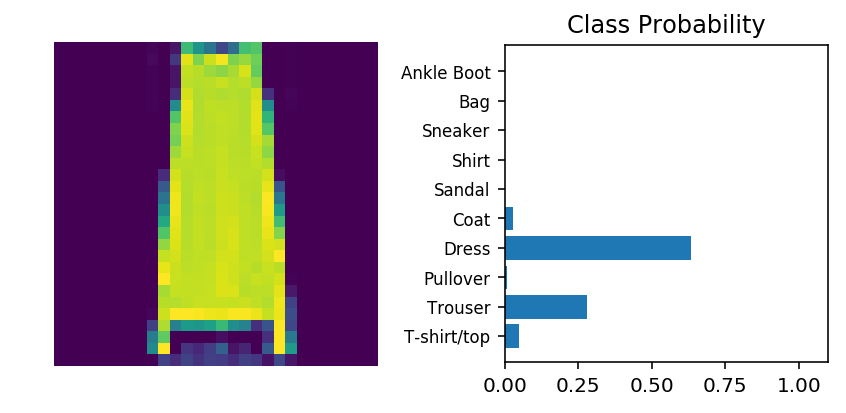

In [79]:
%matplotlib inline
%config InlineBackend.figure_format = 'retina'

import helper 

#Test out your network!

dataiter = iter(test_loader)
images, labels = dataiter.next()
img = images[3]

#Calculate the class probabilities (softmax) for img

ps = torch.exp(model(img))

#plot the image and probabilities
helper.view_classify(img, ps, version='Fashion')